#Dataset Acquisition:

Obtain the Titanic dataset. You can download it from reputable sources such as Kaggle (https://www.kaggle.com/c/titanic/data) or use datasets available directly through Python libraries.

Exploratory Data Analysis (EDA):

+Load the Titanic dataset into a Pandas DataFrame.

Use Pandas methods to explore and understand the dataset:
+Display the first few rows to get an overview of the data structure.
+Check the dimensions of the dataset (number of rows and columns).
+Identify missing values and decide on strategies for handling them.
    +Compute basic statistics (e.g., mean, median, min, max) for numerical columns.
    Analyze categorical variables (e.g., value counts).

Data Visualization:

Choose one column of the dataset that interests you
Use Matplotlib pyplot to create a meaningful visualization:
Select an appropriate plot type (e.g., bar chart, histogram, pie chart).
Label axes, add a title.
Ensure the visualization is clear, informative, and visually appealing.

In [24]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [50]:
dataset = pd.read_csv("/content/titanic_dataset.csv")
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
#Check the dimensions of the dataset (number of rows and columns)

rows, columns = dataset.shape
print(f"The dataset has {rows} rows and {columns} columns") #The dataset has 891 rows and 12 columns

The dataset has 891 rows and 12 columns


In [51]:
#Identify missing values and decide on strategies for handling the missing values

dataset.isnull().sum() #age, cabin, embarked

dataset_no_null_data = dataset.dropna()
dataset_no_null_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [52]:
#delete columns SibSp, Parch, Embarked, Ticket, Age, Cabin, Sex, Survived
dataset_for_calc = dataset.drop(columns=["PassengerId", "Name", "SibSp", "Parch", "Embarked", "Ticket", "Cabin", "Sex", "Pclass"])
dataset_for_calc.head(5)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [58]:
#Compute basic statistics (e.g., mean, median, min, max) for numerical columns.

statistics = {
    "Max": dataset_for_calc.max(),
    "Min": dataset_for_calc.min(),
    "Mean": dataset_for_calc.mean(),
    "Median": dataset_for_calc.median()
}
statistics_df = pd.DataFrame(statistics)
print(statistics_df)

               Max   Min       Mean   Median
Survived    1.0000  0.00   0.383838   0.0000
Pclass      3.0000  1.00   2.308642   3.0000
Age        80.0000  0.42  29.699118  28.0000
Fare      512.3292  0.00  32.204208  14.4542


In [66]:
#Analyze categorical variables (e.g., value counts)

#unknown age
null_age_count = dataset['Age'].isnull().sum()
print(f"Number of passengers with unknown age: {null_age_count}")

#how many survived (0 and 1)
survived_counts = dataset_for_calc['Survived'].value_counts()
print("Counts of unique values in 'Survived':\n", survived_counts)

Number of passengers with unknown age': 177
Counts of unique values in 'Survived':
 Survived
0    549
1    342
Name: count, dtype: int64


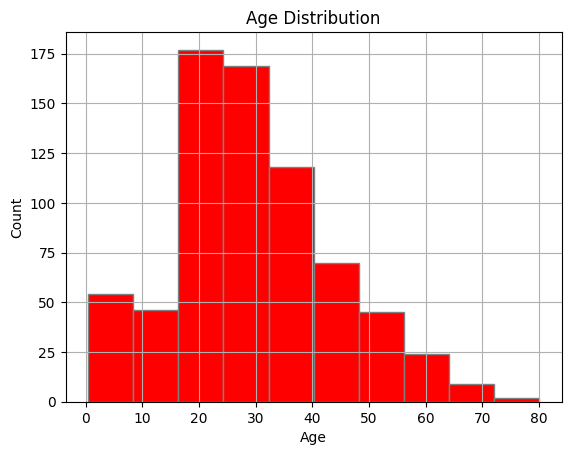

In [68]:
#analysis of age of the Titanic passengers
dataset_for_calc['Age'].dropna().hist(bins=10, color='red', edgecolor='gray')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


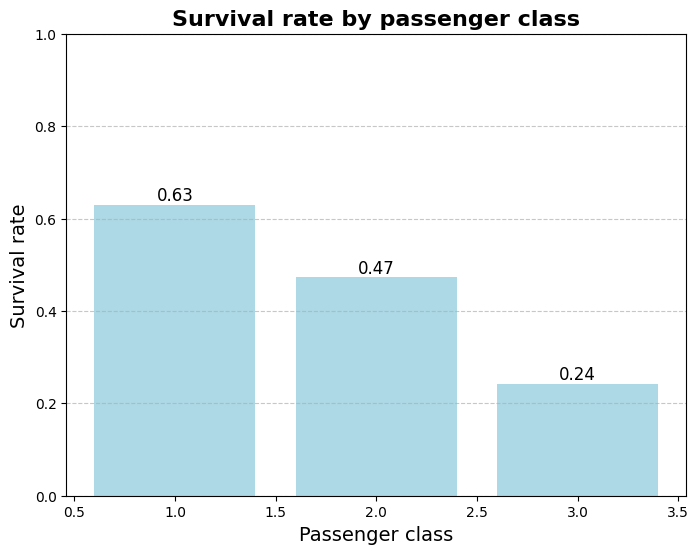

In [76]:
#connection between Pclass and survival
pclass_survival = dataset_for_calc.groupby("Pclass")["Survived"].mean()
print(pclass_survival)

#visualisation
plt.figure(figsize=(8, 6))
bars = plt.bar(pclass_survival.index, pclass_survival.values, color=["lightblue"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)
plt.xlabel("Passenger class", fontsize=14)
plt.ylabel("Survival rate", fontsize=14)
plt.title("Survival rate by passenger class", fontsize=16, fontweight='bold')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()